<a href="https://colab.research.google.com/github/joyfulspace/ADP/blob/master/07_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_10_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열분석
- 독립 변수가 시간에 따라 변하는 패턴을 가진 변수에 사용하는 분석방법
- 추세, 계절성, 잡음으로 분류
  - 회귀분석의 변형으로 같은 변수의 자기상관관계가 존재 (autocorrelation)
  - 잡음의 구조 확인: 잡음이 완전한 노이즈가 될 때까지 브리즈를 계속함
  - 추세: 전반적으로 주기가 없이 데이터가 성장하거나 하락하는 경우
    - 차분: 추세를 없애는 방법. 
      - 하나의 시간대의 데이터 - 과거 시간대의 데이터
      - 평균이 일정해져 추세가 사라짐
- 이동평균선: 구간별 평균점을 연결한 선
- 자기상관계수: 같은 시계열 변수의 다른 시간대의 상관관계 계수 (autocorrelation)
  - 어떤 변수의 과거가 미래 자신의 변수에 영향을 미치는 관계
- 교차상관계수: 다른 시계열 변수끼리의 상관관계 계수 (cross correlation)
  - 과거의 시계열이 미래의 시계열에 시간 간격으로 영향을 줌
- 수식
  - $x_t = T_t+S_t+a_t, a_t \sim N(0,σ)$
    - $T_t$: 추세, $S_t$: 계절성, $a_t$: 잡음
  - 자기상관함수 $r_k=\frac{∑^n_{i=k+1}(x_i-\bar{x})(x_{i-k}-\bar{x})}{\sum^n_{i=1}(x_i-\bar{x})^2}$
    - 변수 1개
    - 분모: x변수에 대한 분산, 분자: 공분산
  - 교차상관함수 $c_k(x,y)=\frac{∑^n_{i=k+1}(x_i-\bar{x})(y_{i-k}-\bar{y})}{\sqrt{\sum^n_{i=1}(x_i-\bar{x})^2}\sqrt{\sum^n_{i=1}(y_i-\bar{y})^2}}$
    - 변수 2개
    - 분모: x와 y의 표준편차 곱, 분자: x와 y의 공분산
- 정상성
  - 조건
    1. 모든 시점 t에 대하여 평균이 일정
      - $E(Z_t)=μ$
    2. 분산 $Var(Z_t)$은 시점 t에 의존하지 않는다.
    3. 두 시점 t,s에서 공분산 $Cov(Z_t, Z_s)$는 시차 t-s에 의존하고 t,s에 의존하지 않는다.
  - 차분으로 정상성을 많이 만듬 (비정상성 시계열은 n번의 차분을 통해 정상성으로 변할 수 있다.)
  - 비정상성을 정상성으로 만들어야 ARMA모델을 적용시킬 수 있다.

### 자기상관관계분석과 ARIMA모델
- 자기상관함수 ACF(Auto Correlation Function)
  - lag가 k인 관측치 간의 관련성을 측정하는 함수
  - $\rho_k=\frac{Cor(y_t, y_{t+k})}{Var(y_t)}$
- 편자기상관함수 PACF(Partial Auto Correlation Function)
  - lag가 k외의 다른 모든 관측치를 제외하고 $y_t$, $y_{t-k}$와의 관련성만 측정하는 함수
  - $\phi_k=corr(y_t, y_{t+k}|y_{t-1}, y_{t-2}, y_{t-3},..., y_{t-k+1})$
- ACF, PACF의 신뢰구간을 벗어난 선분의 개수를 보고 ARIMA 모델 생성
- ARIMA모델
  - 매개변수: p, d, q
    - p: AR모델 계수
    - q: MA모델 계수
    - p, q: PACF, ACF의 그래프를 보고 정함
    - d: 차분의 개수
  - AR(자기회귀모형) + I(누적모형) + MA(이동평균모형)
    - AR(1): $Z_t= \phi_1 Z_{t-1}+a_t, |ϕ_1|<1$
    - 누적모형: 몇 번의 차분으로 정상성이 되었는지
    - MA(1): $Z_t=a_t- \theta_1 a_{t-1}$. 관측값이 이전의 오차항의 영향을 받는다

  - AR특성: ACF가 천천히 감소가고 PACF가 처음 시차를 제외하고 급격이 감소
  - MA특성: ACF가 급격히 감소가고 PACF가 완만하게 감소

In [2]:
!git clone https://github.com/joyfulspace/ADP.git

Cloning into 'ADP'...
remote: Enumerating objects: 2555, done.
remote: Counting objects: 100% (2248/2248), done.
remote: Compressing objects: 100% (2242/2242), done.
remote: Total 2555 (delta 59), reused 2135 (delta 4), pack-reused 307
Receiving objects: 100% (2555/2555), 56.15 MiB | 16.40 MiB/s, done.
Resolving deltas: 100% (181/181), done.
Checking out files: 100% (2406/2406), done.


## 실습1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('ADP/data/multiTimeline.csv', skiprows=1)  # 구글트렌드 자료(다이어트 관련)

In [4]:
df.head()

,2004-01,100,31,48
0,2004-02,76,26,48
1,2004-03,68,24,47
2,2004-04,70,22,47
3,2004-05,73,23,43
4,2004-06,66,24,44


In [5]:
# 칼럼명 지정
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-02,76,26,48
1,2004-03,68,24,47
2,2004-04,70,22,47
3,2004-05,73,23,43
4,2004-06,66,24,44


In [6]:
df.month = pd.to_datetime(df.month)

# index 설정
df.set_index('month', inplace=True)

Text(0.5, 0, 'Year')

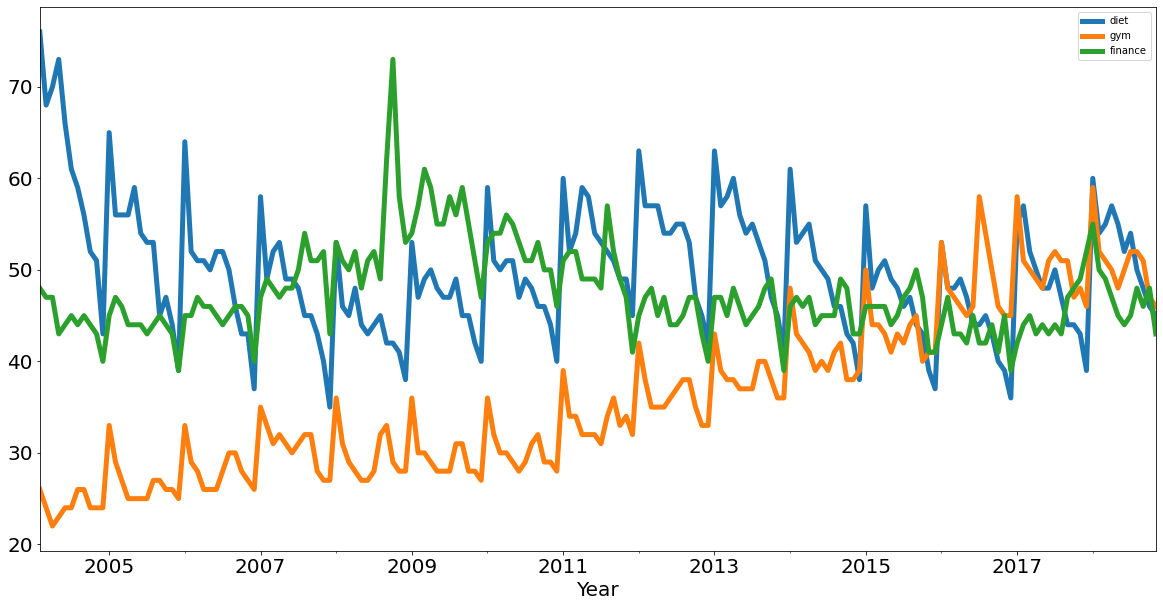

In [8]:
# 3개의 컬럼에 대한 시계열 곡선
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

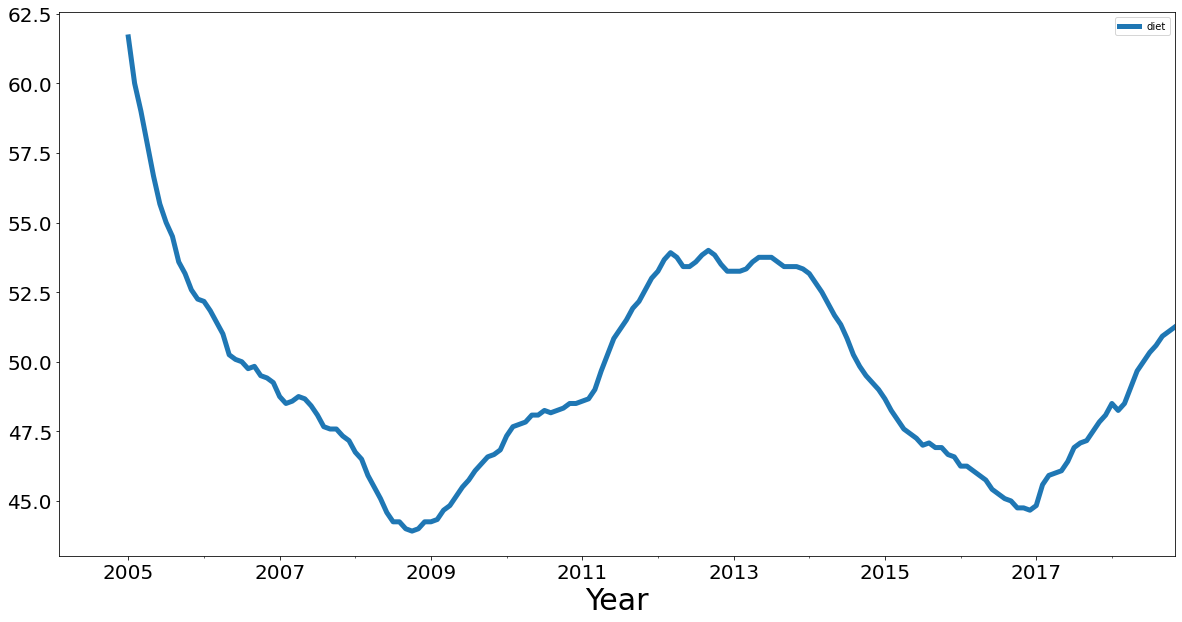

In [13]:
# 12사이즈의 이동평균
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

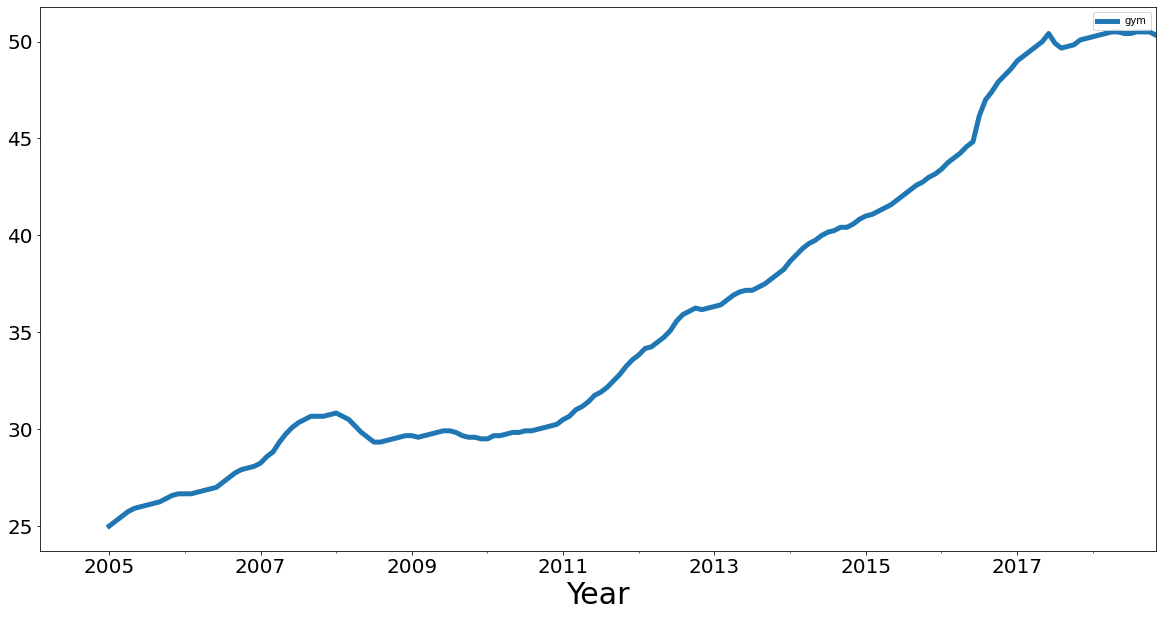

In [14]:
# gym에 대한 이동평균
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

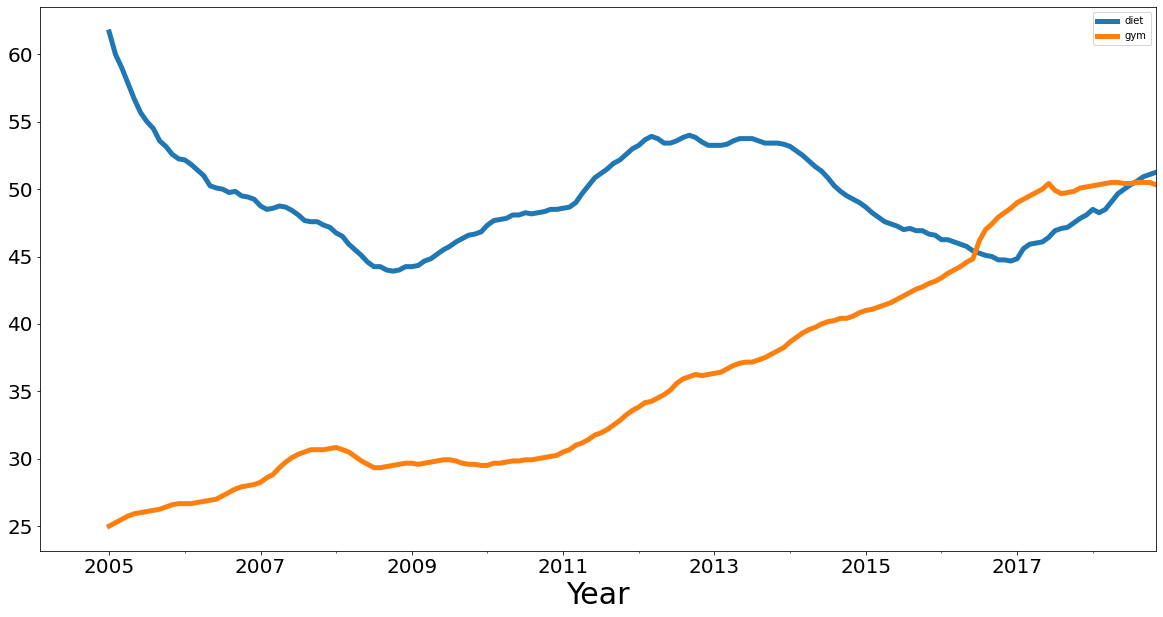

In [15]:
# 2개의 이동평균 곡선을 같이 보여준다.
df_dg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_dg.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

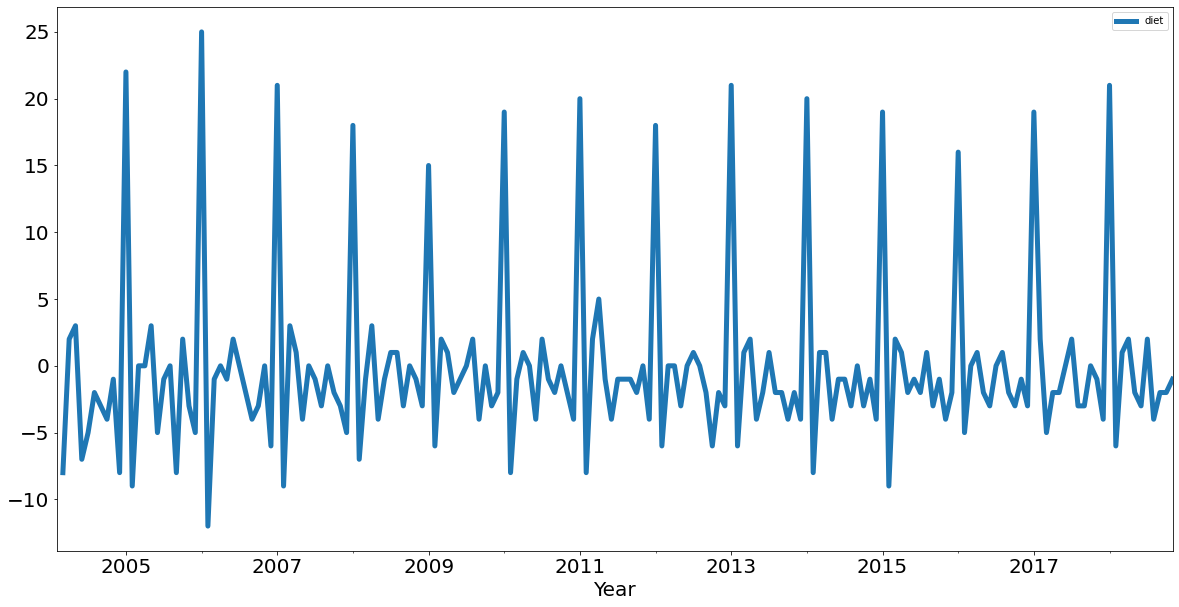

In [16]:
# 다이어트 곡선에 대한 차분그래프. 평균, 분산이 일정해짐
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [17]:
# 컬럼간의 상관관계 행렬
df.corr()

,diet,gym,finance
diet,1.000000,-0.039623,-0.041780
gym,-0.039623,1.000000,-0.229946
finance,-0.041780,-0.229946,1.000000


Text(0.5, 0, 'Year')

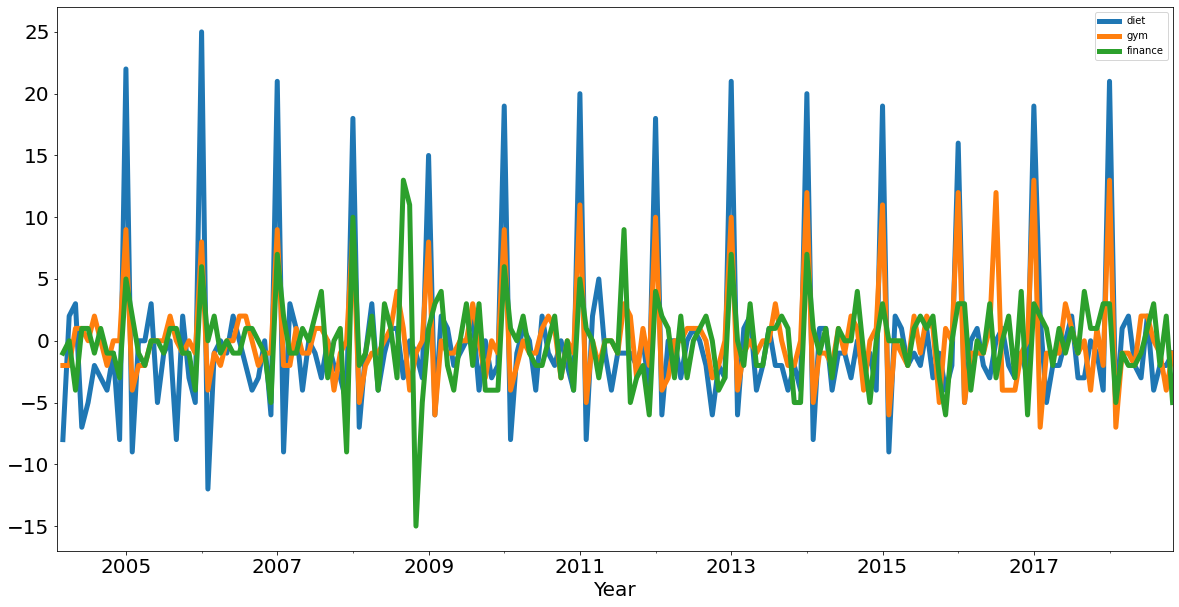

In [18]:
# 3개의 속성에 대한 차분그래프
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [19]:
# 차분에 대한 상관관계 행렬
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.800682,0.397953
gym,0.800682,1.000000,0.342698
finance,0.397953,0.342698,1.000000


## 실습2

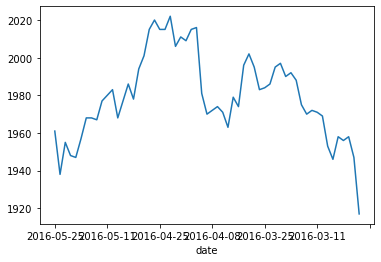

In [20]:
import pandas as pd
%matplotlib inline 

# 2016-05-25 ~ 2016-02-29 까지의 코스피지수
series = pd.read_csv('ADP/data/kospi3.csv', header=0, index_col=0, squeeze=True)
series.plot()

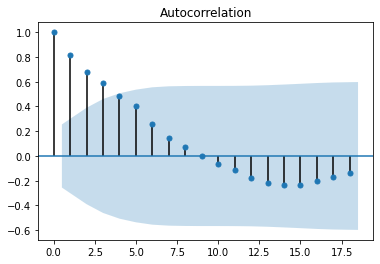

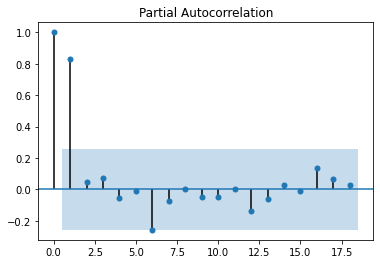

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ACF, PACF곡선 그리기
plot_acf(series)
plot_pacf(series)
plt.show()

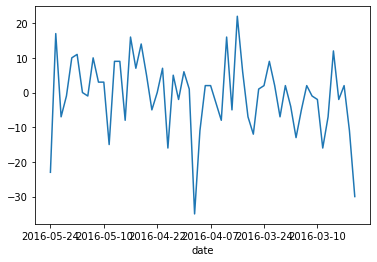

In [22]:
# 차분곡선 그래프
diff_1 = series.diff(periods=1).iloc[1:]
diff_1.plot()

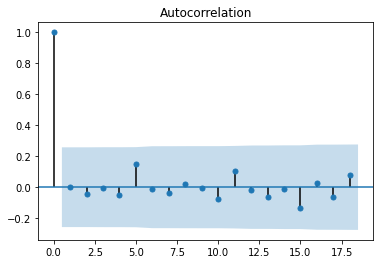

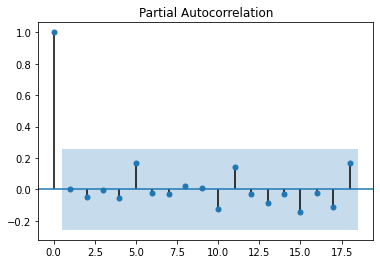

In [28]:
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [29]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA(1,2,1)모델 만들고 훈련하기
model = ARIMA(series, order=(1,2,1))
model_fit = model.fit(trend='c', full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -217.690
Method:                       css-mle   S.D. of innovations             10.632
Date:                Mon, 08 Aug 2022   AIC                            443.379
Time:                        07:21:28   BIC                            451.551
Sample:                             2   HQIC                           446.555
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1465      0.080     -1.823      0.074      -0.304       0.011
ar.L1.D2.close    -0.0396      0.149     -0.266      0.791      -0.332       0.252
ma.L1.D2.close    -1.0000      0.050

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
# AR의 p-value가 좋지 않아 삭제
# ARIMA(0,2,1)모델 만들고 훈련하기
model = ARIMA(series, order=(0,2,1))
model_fit = model.fit(trend='c', full_output=True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -217.725
Method:                       css-mle   S.D. of innovations             10.646
Date:                Mon, 08 Aug 2022   AIC                            441.450
Time:                        07:22:42   BIC                            447.579
Sample:                             2   HQIC                           443.832
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1464      0.084     -1.754      0.085      -0.310       0.017
ma.L1.D2.close    -1.0000      0.050    -20.045      0.000      -1.098      -0.902
                                    

In [31]:
# 여전히 p-value가 0.05보다 높아 추세를 nc로 변경
model = ARIMA(series, order=(0,2,1))
model_fit = model.fit(trend='nc', full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -218.944
Method:                       css-mle   S.D. of innovations             11.055
Date:                Mon, 08 Aug 2022   AIC                            441.887
Time:                        07:23:32   BIC                            445.974
Sample:                             2   HQIC                           443.475
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ma.L1.D2.close    -0.9430      0.059    -15.987      0.000      -1.059      -0.827
                                    Roots                                    
                  Real          Imaginary

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


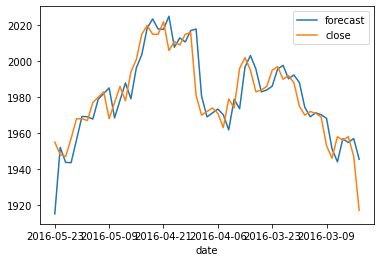

In [33]:
model_fit.plot_predict()
plt.show()

In [34]:
fore = model_fit.forecast(steps=1)
print(fore) # 평균, 분산, 신뢰구간

(array([1913.77022019]), array([11.0549822]), array([[1892.10285323, 1935.43758715]]))


In [35]:
fore = model_fit.forecast(steps=10)
print(fore)

(array([1913.77022019, 1910.54044038, 1907.31066057, 1904.08088076,
       1900.85110095, 1897.62132114, 1894.39154133, 1891.16176152,
       1887.93198171, 1884.7022019 ]), array([11.0549822 , 16.08556969, 20.25813239, 24.0404851 , 27.60792829,
       31.04743848, 34.4089419 , 37.72381755, 41.01304651, 44.29129903]), array([[1892.10285323, 1935.43758715],
       [1879.01330311, 1942.06757765],
       [1867.60545068, 1947.01587045],
       [1856.96239579, 1951.19936572],
       [1846.7405558 , 1954.96164609],
       [1836.76945991, 1958.47318236],
       [1826.95125445, 1961.8318282 ],
       [1817.22443776, 1965.09908527],
       [1807.54788764, 1968.31607577],
       [1797.89285098, 1971.51155281]]))
